## Discrete-time competitive Beverton-Holt model

\begin{align}
N_{1,t+1}=\dfrac{r_1N_{1,t}}{1+a_{11}N_{1,t}+a_{12}N_{2,t}} \\
N_{2,t+1}=\dfrac{r_2N_{2,t}}{1+a_{22}N_{2,t}+a_{21}N_{1,t}}
\tag{1}
\end{align}

## Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import jit
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('onedork') #grade3

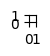

In [2]:
# Dummy plot
fig, ax = plt.subplots(figsize=(0.1, 0.1))
ax.axhline(y=1, color='grey', linestyle='-')
plt.rcParams.update({'font.size': 30})

In [3]:
step=2

## Increasing X = N1 = N2

In [4]:
@jit(nopython=True)
def time_simul(r1,r2,a11,a22,a12,a21,y01,y02):
    tmax = 2
    y1 = np.zeros(tmax)
    y2 = np.zeros(tmax)
    per_cap1 = np.zeros(tmax)
    per_cap2 = np.zeros(tmax)
    y1_relat = np.zeros(tmax)
    y2_relat = np.zeros(tmax)
    y1[0],y2[0] = y01,y02 # initial conditions
    i,stopRun = 0,0
    while stopRun==0: # stops the simulation when the dynamics converges
        per_cap1[i] = r1 / ( 1 + a11 * y1[i] + a12 * y2[i] )
        per_cap2[i] = r2 / ( 1 + a22 * y2[i] + a21 * y1[i] )
        y1[i+1] = y1[i] * per_cap1[i]
        y2[i+1] = y2[i] * per_cap2[i]
        y1_relat[i]=y1[i]/(y1[i]+y2[i])
        y2_relat[i]=y2[i]/(y1[i]+y2[i])
        per_cap1=np.append(per_cap1,per_cap1[i])
        per_cap2=np.append(per_cap2,per_cap2[i])
        y1=np.append(y1,y1[i])
        y2=np.append(y2,y2[i])
        y1_relat=np.append(y1_relat,y1_relat[i])
        y2_relat=np.append(y2_relat,y2_relat[i])
        if np.abs(y1[i+1]-y1[i]) < 1.0e-3 and np.abs(y2[i+1]-y2[i]) < 1.0e-3:
            stopRun=1
        i+=1 # i=i+1
        if i>100:
            break
    return y1,y2,per_cap1,per_cap2,y1_relat,y2_relat

In [5]:
def biggest_PGR(sp1,sp2):
    if sp1>sp2:
        return "sp1"
    elif sp1<sp2:
        return "sp2"
    else:
        return 999
#     return "sp1" if sp1>sp2 else "sp2"

In [6]:
## Discrete-time competitive Beverton-Holt model
df=open('output.txt','w')
#df.write("r1" + "\t" + "r2" + "\t" + "a11" + "\t" + "a12" + "\t" + "a21" + "\t" + "a22" + "\t" + "X_increase" + "\t" + "N1_fix" + "\t" + "N2_fix" + "\t" + "log(per_capita1)_fix" + "\t" + "log(per_capita2)_fix" + "\t" + "N1_rel_fix" + "\t" + "N2_rel_fix" + "\t" + "S1" + "\t" + "S2" + "\t" + "N1" + "\t" + "N2" + "\t" + "log(per_capita1)" + "\t" + "log(per_capita2)" + "\t" + "N1_rel" + "\t" + "N2_rel" + "\t" + "N1>0" + "\t" + "N2>0" + "\t" + "Cross" + "\n")
df.write( "X_increase" + "\t" + "log(per_capita1)_fix" + "\t" + "log(per_capita2)_fix" + "\t" + "N1" + "\t" + "N2" + "\t" + "log(per_capita1)" + "\t" + "log(per_capita2)" + "\t" + "N1_rel" + "\t" + "N2_rel" + "\t" + "N1>0" + "\t" + "N2>0" + "\t" + "Cross" + "\t" + "r1" + "\t" + "r2" + "\t" + "a11" + "\t" + "a12" + "\t" + "a21" + "\t" + "a22" + "\t" + "S1" + "\t" + "S2" + "\n" )
for r1 in range(15,21,step):
    for r2 in range(11,21,step):
        for a11 in np.arange(0.7,3.1,step/10):
            for a12 in np.arange(0.1,1.1,step/10):
                for a21 in np.arange(0.1,1.1,step/10):
                    for a22 in np.arange(0.1,1.1,step/10):
                        # reset the vectors
                        per_capita1 = np.zeros(1)
                        per_capita2 = np.zeros(1)
                        y1_posterior = np.zeros(1)
                        y2_posterior = np.zeros(1)
                        y_rel1 = np.zeros(1)
                        y_rel2 = np.zeros(1)
                        ## Strength of stabilization
                        S1=r2/(1+(a12/a22)*(r2-1))
                        S2=r1/(1+(a21/a11)*(r1-1))                     
                        ## Discrete-time competitive Beverton-Holt model
                        X,i,stopRun,var1,var2,start,final,sp1,sp2=0,0,0,0,0,0,0,0,0
                        while stopRun==0:
                            X+=1
                            per_capita1[i] = r1 / ( 1 + a11 * X + a12 * X )
                            per_capita2[i] = r2 / ( 1 + a22 * X + a21 * X )
                            y1_posterior[i] = X * per_capita1[i]
                            y2_posterior[i] = X * per_capita2[i]
                            y_rel1[i]=y1_posterior[i]/(y1_posterior[i]+y2_posterior[i])
                            y_rel2[i]=y2_posterior[i]/(y1_posterior[i]+y2_posterior[i])
                            # add the values to the vectors:
                            per_capita1=np.append(per_capita1,per_capita1[i])
                            per_capita2=np.append(per_capita2,per_capita2[i])
                            y1_posterior=np.append(y1_posterior,y1_posterior[i])
                            y2_posterior=np.append(y2_posterior,y2_posterior[i])
                            y_rel1=np.append(y_rel1,y_rel1[i])
                            y_rel2=np.append(y_rel2,y_rel2[i])
                            #time
                            y1,y2,per_cap1,per_cap2,y1_relat,y2_relat = time_simul(r1,r2,a11,a22,a12,a21,y1_posterior[i],y2_posterior[i])
                            if np.abs(y1[-1]-var1) < 1.0e-4 and np.abs(y2[-1]-var2) < 1.0e-4:
                                stopRun=1
                            var1,var2=y1[-1],y2[-1]
                            i+=1
                            #save
                            sp1,sp2=np.array([per_capita1[0],per_capita1[-1]]),np.array([per_capita2[0],per_capita2[-1]])
                            start,final=biggest_PGR(sp1[0],sp2[0]),biggest_PGR(sp1[1],sp2[1])
                            if start==999 or final==999:
#                                 df.write(str(r1) + "\t" + str(r2) + "\t" + str(a11) + "\t" + str(a12) + "\t" + str(a21) + "\t" + str(a22) + "\t" + str(X) + "\t" + str(y1_posterior[i]) + "\t" + str(y2_posterior[i]) + "\t" + str(np.log(per_capita1[i])) + "\t" + str(np.log(per_capita2[i])) + "\t" + str(y_rel1[-1]) + "\t" + str(y_rel2[-1]) + "\t" + str(S1) + "\t" + str(S2) + "\t" + str(y1[-1]) + "\t" + str(y2[-1]) + "\t" + str(np.log(per_cap1[-1])) + "\t" + str(np.log(per_cap2[-1])) + "\t" + str(y1_relat[-1]) + "\t" + str(y2_relat[-1]) + "\t" + str(y1[-1]>0.01) + "\t" + str(y2[-1]>0.01)+ "\t" + str(999))
                                df.write( str(X) + "\t" + str(np.log(per_capita1[i])) + "\t" + str(np.log(per_capita2[i])) + "\t" + str(y1[-1]) + "\t" + str(y2[-1]) + "\t" + str(np.log(per_cap1[-1])) + "\t" + str(np.log(per_cap2[-1])) + "\t" + str(y1_relat[-1]) + "\t" + str(y2_relat[-1]) + "\t" + str(y1[-1]>0.01) + "\t" + str(y2[-1]>0.01)+ "\t" + str(999) + "\t" + str(r1) + "\t" + str(r2) + "\t" + str(a11) + "\t" + str(a12) + "\t" + str(a21) + "\t" + str(a22) + "\t" + str(S1) + "\t" + str(S2) )
                            else:
#                                 df.write(str(r1) + "\t" + str(r2) + "\t" + str(a11) + "\t" + str(a12) + "\t" + str(a21) + "\t" + str(a22) + "\t" + str(X) + "\t" + str(y1_posterior[i]) + "\t" + str(y2_posterior[i]) + "\t" + str(np.log(per_capita1[i])) + "\t" + str(np.log(per_capita2[i])) + "\t" + str(y_rel1[-1]) + "\t" + str(y_rel2[-1]) + "\t" + str(S1) + "\t" + str(S2) + "\t" + str(y1[-1]) + "\t" + str(y2[-1]) + "\t" + str(np.log(per_cap1[-1])) + "\t" + str(np.log(per_cap2[-1])) + "\t" + str(y1_relat[-1]) + "\t" + str(y2_relat[-1]) + "\t" + str(y1[-1]>0.01) + "\t" + str(y2[-1]>0.01)+ "\t" + str(start!=final))
                                df.write( str(X) + "\t" + str(np.log(per_capita1[i])) + "\t" + str(np.log(per_capita2[i])) + "\t" + str(y1[-1]) + "\t" + str(y2[-1]) + "\t" + str(np.log(per_cap1[-1])) + "\t" + str(np.log(per_cap2[-1])) + "\t" + str(y1_relat[-1]) + "\t" + str(y2_relat[-1]) + "\t" + str(y1[-1]>0.01) + "\t" + str(y2[-1]>0.01)+ "\t" + str(start!=final) + "\t" + str(r1) + "\t" + str(r2) + "\t" + str(a11) + "\t" + str(a12) + "\t" + str(a21) + "\t" + str(a22) + "\t" + str(S1) + "\t" + str(S2) )
                            df.write('\n')
                        
df.close()

## Finite Growth Rate and Stock Recruitment Curve

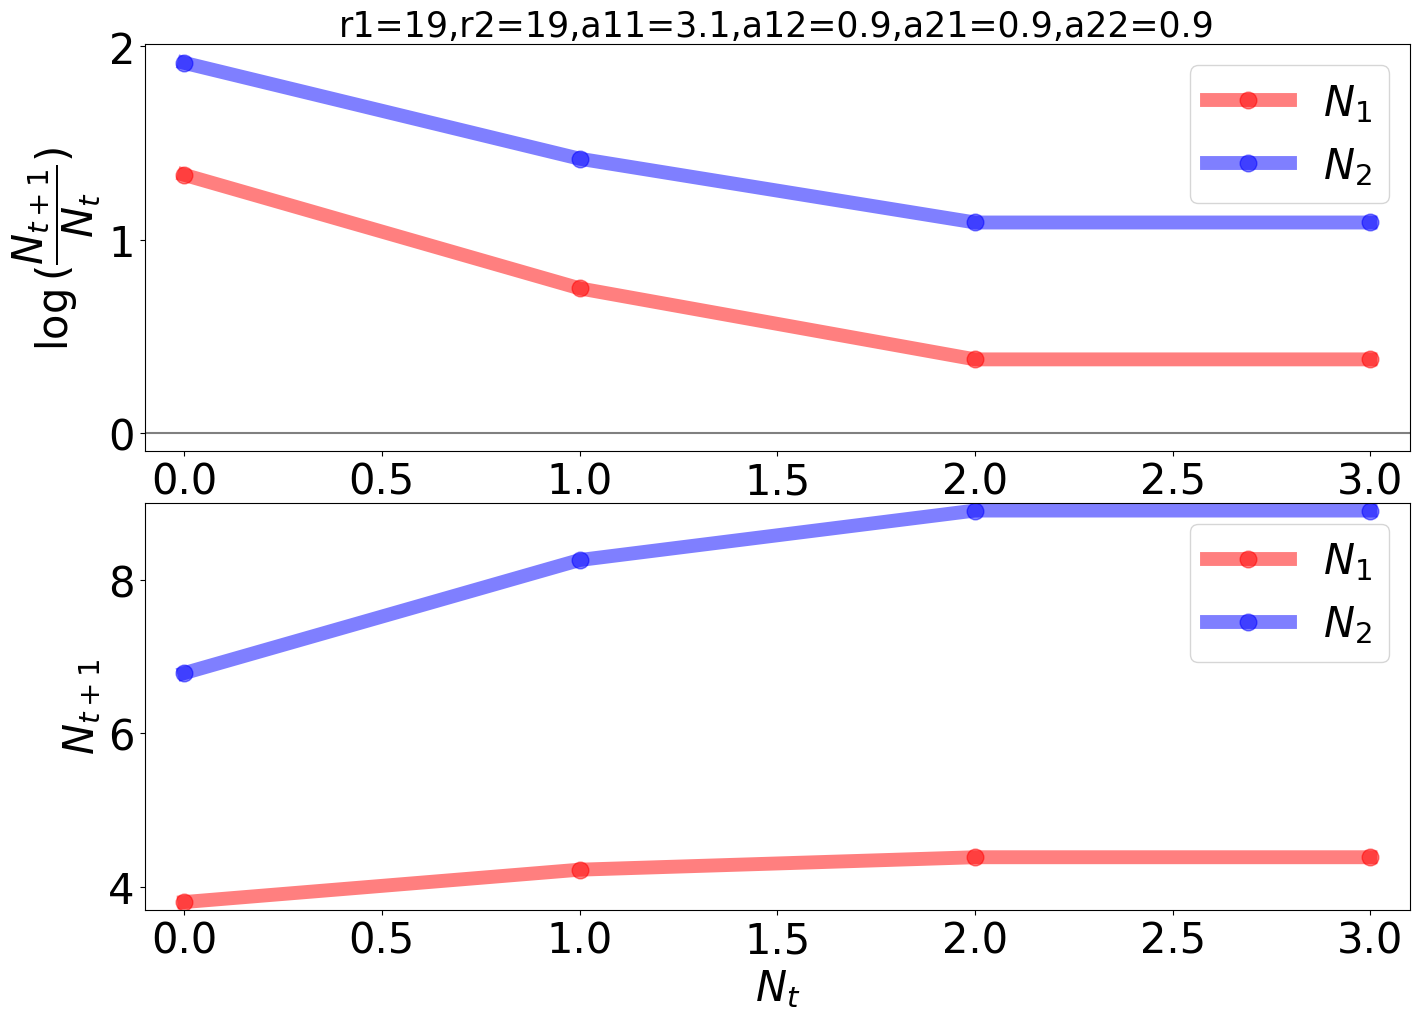

In [7]:
y_increasing = np.linspace(0,X,X+1)
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
# Finite Growth Rate
ax1.plot(y_increasing, np.log(per_capita1), alpha=0.5,marker="o", linewidth=10, markersize=12, color="r", label='$N_{1}$')
ax1.set(ylabel='$\log{(\dfrac{N_{t+1}}{N_t})}$')
ax1.set_xlim([np.min(y_increasing)-0.1, np.max(y_increasing)+0.1])
ax1.plot(y_increasing, np.log(per_capita2), alpha=0.5,marker="o", linewidth=10, markersize=12, color="b", label='$N_{2}$')
ax1.axhline(y=0, color='grey', linestyle='-')
ax1.legend()
# Stock-Recruitment
ax2.plot(y_increasing, y1_posterior, alpha=0.5,marker="o", linewidth=10, markersize=12, color="r", label='$N_{1}$')
ax2.set_xlim([np.min(y_increasing)-0.1, np.max(y_increasing)+0.1])
ax2.set_ylim([min(np.min(y1_posterior),np.min(y2_posterior))-0.1, max(np.max(y1_posterior),np.max(y2_posterior))+0.1])
ax2.set(xlabel='$N_{t}$', ylabel='$N_{t+1}$')
ax2.plot(y_increasing, y2_posterior, alpha=0.5,marker="o", linewidth=10, markersize=12, color="b", label='$N_{2}$')
ax2.plot(y_increasing,y_increasing, color="grey") # add a straight line
ax2.legend()
plt.rcParams.update({'font.size': 30})
ax1.set_title('r1='+str(np.around(r1,1))+',r2='+str(np.around(r2,1))+',a11='+str(np.around(a11,1))+',a12='+str(np.around(a12,1))+',a21='+str(np.around(a21,1))+',a22='+str(np.around(a22,1)), fontsize=25)
plt.tight_layout(pad=0)
plt.savefig('img/increasing_finite_growth_rate_r1_'+str(np.around(r1,1))+'_r2_'+str(np.around(r2,1))+'_a11_'+str(np.around(a11,1))+'_a12_'+str(np.around(a12,1))+'_a21_'+str(np.around(a21,1))+'_a22_'+str(np.around(a22,1))+'.png', format='png', dpi=50, bbox_inches='tight')
plt.show()

# Dynamics

In [8]:
# Variables for the per capita growth rate
tmax = 2
time = np.linspace(1,tmax,tmax)

y1 = np.zeros(tmax)
y2 = np.zeros(tmax)
per_capita1 = np.zeros(tmax)
per_capita2 = np.zeros(tmax)

y1[0] = y1_posterior[-1] # initial conditions
y2[0] = y2_posterior[-1]

In [9]:
y1,y2,per_cap1,per_cap2,y1_relat,y2_relat = time_simul(r1,r2,a11,a22,a12,a21,y1_posterior[i],y2_posterior[i])

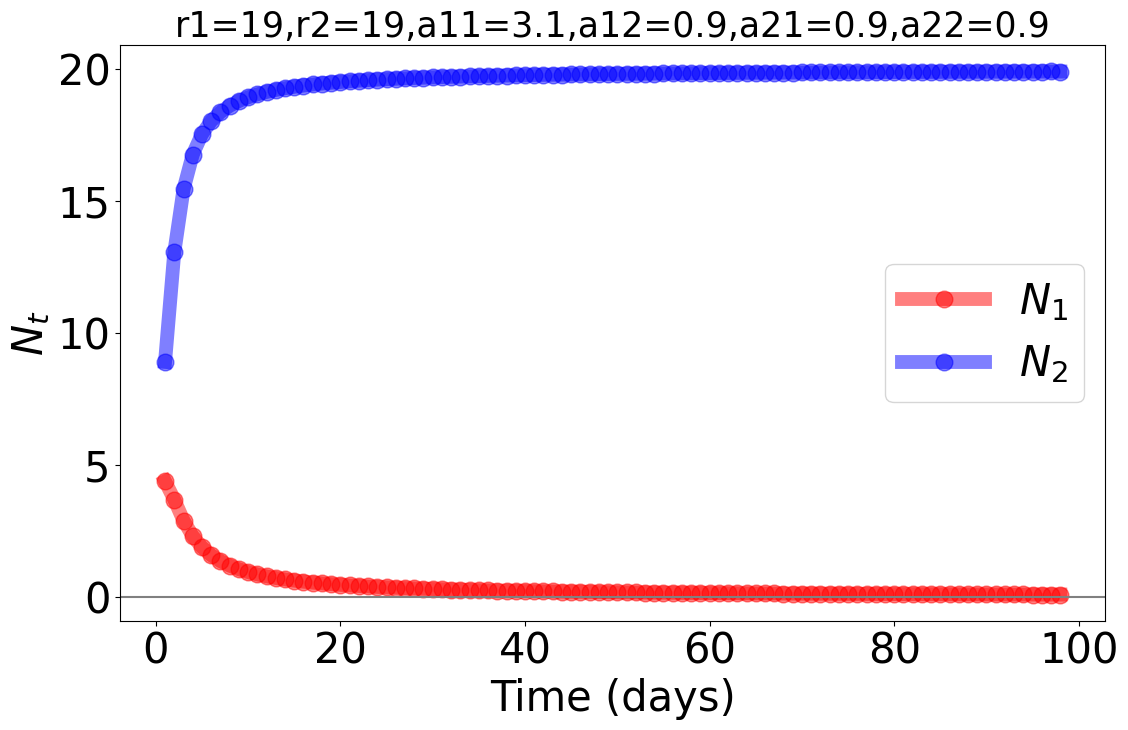

In [10]:
time = np.linspace(1,len(y1),len(y1))

fig, (ax) = plt.subplots(1,figsize=(12, 8))
ax.plot(time, y1, alpha=0.5,marker="o", linewidth=10, markersize=12, color="r", label='$N_{1}$')
ax.plot(time, y2, alpha=0.5,marker="o", linewidth=10, markersize=12, color="b", label='$N_{2}$')
ax.axhline(y=0, color='grey', linestyle='-')
ax.set(xlabel='Time (days)', ylabel='$N_{t}$')
ax.legend()
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(np.around(r1,1))+',r2='+str(np.around(r2,1))+',a11='+str(np.around(a11,1))+',a12='+str(np.around(a12,1))+',a21='+str(np.around(a21,1))+',a22='+str(np.around(a22,1)), fontsize=25)
plt.tight_layout()
plt.savefig('img/time_series_r1_'+str(np.around(r1,1))+'_r2_'+str(np.around(r2,1))+'_a11_'+str(np.around(a11,1))+'_a12_'+str(np.around(a12,1))+'_a21_'+str(np.around(a21,1))+'_a22_'+str(np.around(a22,1))+'.png', format='png', dpi=50)
plt.show()

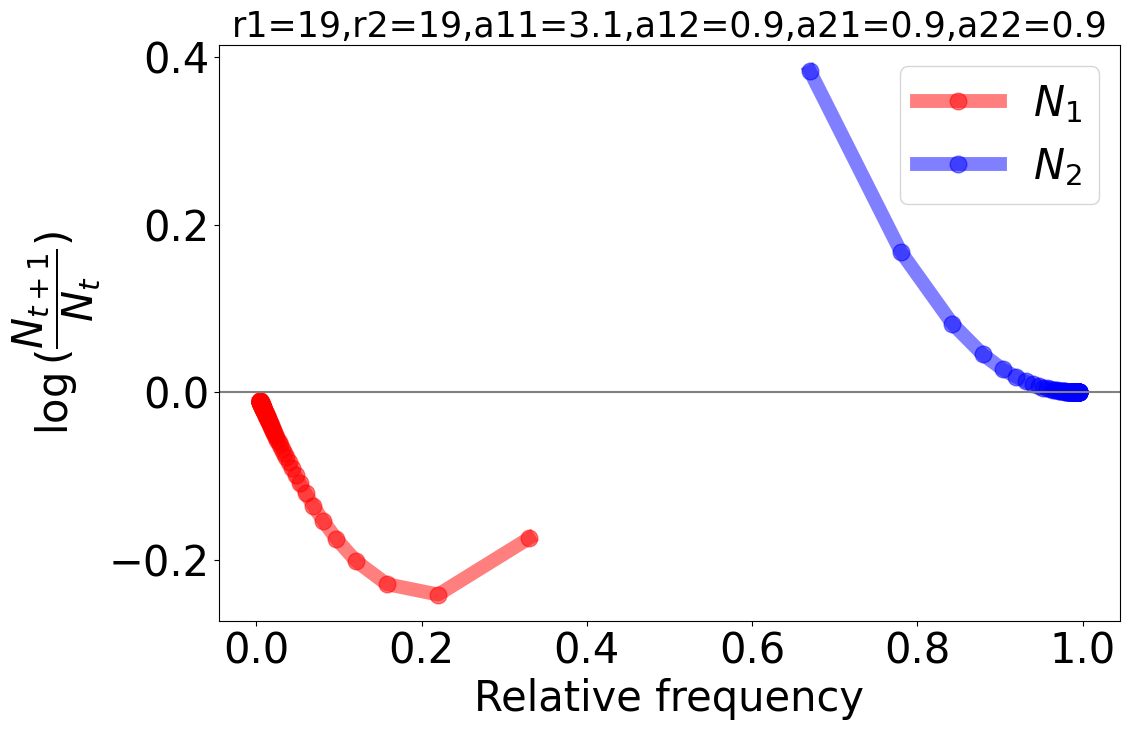

In [11]:
fig, ax = plt.subplots(1,figsize=(12, 8))
ax.plot(y1_relat, np.log(per_cap1), alpha=0.5,marker="o", linewidth=10, markersize=12, color="r", label='$N_{1}$')
ax.plot(y2_relat, np.log(per_cap2), alpha=0.5,marker="o", linewidth=10, markersize=12, color="b", label='$N_{2}$')
ax.axhline(y=0, color='grey', linestyle='-')
ax.set(xlabel='Relative frequency',ylabel='$\log{(\dfrac{N_{t+1}}{N_t})}$')
ax.legend()
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(np.around(r1,1))+',r2='+str(np.around(r2,1))+',a11='+str(np.around(a11,1))+',a12='+str(np.around(a12,1))+',a21='+str(np.around(a21,1))+',a22='+str(np.around(a22,1)), fontsize=25)
plt.tight_layout()
plt.savefig('img/increasing_yenni_r1_'+str(np.around(r1,1))+'_r2_'+str(np.around(r2,1))+'_a11_'+str(np.around(a11,1))+'_a12_'+str(np.around(a12,1))+'_a21_'+str(np.around(a21,1))+'_a22_'+str(np.around(a22,1))+'.png', format='png', dpi=50)
plt.show()